# Chapter 1 - Sequence Statistics 

In [1]:
import os
import sys 

import pandas as pd

In [83]:
%matplotlib inline

##  SARS-COV-2 Genome 
It is stored in a FASTA format, lines starting with `>` to be ignored

In [3]:
cov2genomefile = f'{os.getcwd()}/fasta/SARS-COV-2-MT226610.1.txt'

In [8]:
cov2genome = ''

with open(cov2genomefile) as f:
     for line in f.readlines():
            if not line.startswith('>'):
                cov2genome += line.strip()

In [11]:
cov2genome[:25]

'ATTAAAGGTTTATACCTTCCCAGGT'

In [85]:
print(
    'What is the length of the genome? {:,}'.format(
        len(cov2genome)
    )
)

What is the length of the genome? 29,903


In [88]:
nucleotides_vocabulary = list(set(cov2genome))

print(
    'What is the vocabulary of the genome; i.e. the nucleotides? {}'.format(
        sorted(nucleotides_vocabulary)
    )
)

What is the vocabulary of the genome; i.e. the nucleotides? ['A', 'C', 'G', 'T']


## The Frequency of the nucleotides

The Frequency of the nucleotides are like a fingerprint for each orgnism

In [23]:
nucleotides_frequency = {}

for nucleotide in cov2genome:
    nucleotides_frequency[nucleotide] = nucleotides_frequency.get(nucleotide, 0) + 1

In [24]:
nucleotides_frequency

{'A': 8954, 'T': 9594, 'G': 5863, 'C': 5492}

In [25]:
for nucleotide in nucleotides_frequency:
    freq = nucleotides_frequency[nucleotide] / sum(nucleotides_frequency.values())
    print(
        f'{nucleotide}: {freq:.2%}'
    )

A: 29.94%
T: 32.08%
G: 19.61%
C: 18.37%


In [72]:
window = 500
nucleotides_window_frequency = []

for i in range(0, len(cov2genome), window):
    _nucleotides_frequency = {}
    for nucleotide in cov2genome[i:i+window]:
        _nucleotides_frequency[nucleotide] = _nucleotides_frequency.get(nucleotide, 0) + 1
    nucleotides_window_frequency.append(_nucleotides_frequency)

In [78]:
df_freq = pd.DataFrame(nucleotides_window_frequency) 

In [79]:
totals = df_freq.sum(axis=1)

for nucleotide in nucleotides_vocabulary:
    df_freq[nucleotide] = df_freq[nucleotide] / totals
    
df_freq.index = df_freq.index * window

In [80]:
df_freq.head(4)

,A,C,G,T
0,0.248,0.232,0.232,0.288
500,0.254,0.218,0.260,0.268
1000,0.298,0.186,0.212,0.304
1500,0.304,0.174,0.206,0.316


Changes in frequency reflect different regions in the genome

/Users/tarek/anaconda3/envs/djs/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


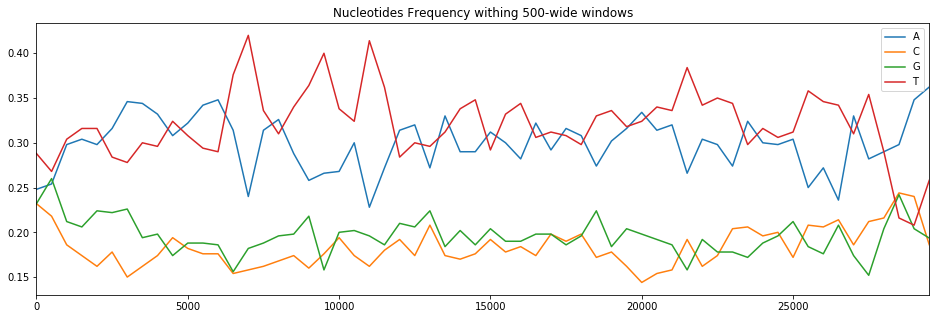

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5), sharey=False)

df_freq.plot(
    title=f'Nucleotides Frequency withing {window}-wide windows',
    kind='line',
    ax=ax
)

fig.show()